# Polynomial Regression

선형회귀로는 풀 수없는 문제들이 존재한다.

가령 $2sin(x)$함수에 노이즈를 추가하여 10개의 점을 만들어서 선형회귀를 시켜보자.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
x = np.linspace(0,2*np.pi,10, dtype=np.float32)
y = 2*np.sin(x) + np.random.randn(len(x))*0.5

In [75]:
def get_linear(x,y):
    Y = y[:,np.newaxis]
    X = np.concatenate((np.ones(len(x))[:,np.newaxis], x[:,np.newaxis]), axis=1)
    w = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(Y) ## Moore-penrose pseudo inverse matrix multiplies Y
    return w.T[0]

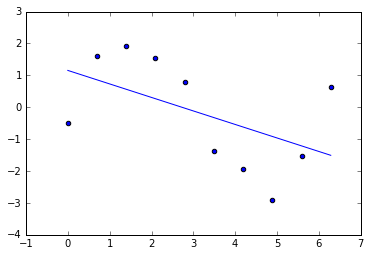

In [76]:
w = get_linear(x,y)
plt.scatter(x, y)
plt.plot(x, w[0] + x * w[1])
plt.show()

선형회귀이므로 당연하게도 본래 함수인 2$sin$함수를 제대로 표현할 수 없다.

따라서 더 복잡한 모델을 풀기위하여 다항식(Polynomial) 모델이 필요하다.

다항식은 이렇게 정의할수 있다.

$P(x) = w_0x^0 + w_1x^1 + \cdots + w_dx^d$ 

여기서 $d$는 다항식의 차수이다.

이런 다항식의 정의를 이용하여 선형함수를 다항함수로 만들어주는 비선형 기저(Non-linear basis) 함수 $\varphi(x)$를 정의한다

비선형 다항함수 $\varphi(x)$의 정의는 다음과 같다.

$\varphi_i(x) = x^i$

앞서 우리는 $X$를

$X=\begin{bmatrix}x_{01}&\cdots&x_{11}\\ \vdots&\ddots&\vdots\\ x_{0n}&\cdots&x_{dn}\end{bmatrix}$라고 정의하였다.

원하는 차수 d를 파라미터로 하여 모든 x값에 비선형 함수를 적용한 행렬을 $\Phi$ 라고 정의한다


$\Phi=\begin{bmatrix}\varphi_0(x_1)&\varphi_1(x_1)&\cdots&\varphi_d(x_1)\\ \vdots&\ddots&\ddots&\vdots\\
\varphi_0(x_n)&\varphi_1(x_n)&\cdots&\varphi_d(x_n)\end{bmatrix}$  즉


$\Phi = \begin{bmatrix} x_1^0 & x_1^1 & \cdots & x_1^d \\ 
\vdots&\ddots & \ddots &\vdots \\
x_n^0 & x_n^1& \cdots &x_n^d \end{bmatrix}$


따라서 $Y = \Phi w$가 되고

Moore-Penrose Pseudoinverse matrix 기법에 따라서

$w = (\Phi^T\Phi)^{-1}\Phi^TY$ 가 된다. 또한 $\Phi^{†} = (\Phi^T\Phi)^{-1}\Phi^T$라고 정의할 수 있다.

아래에, 실제 코드와 3차 다항식으로 근사하였을 때, 결과이다.

In [77]:
def get_poly(x,y,n=1):
    x_0 = np.ones(len(x))[:,np.newaxis]
    x = x[:,np.newaxis]
    X = np.concatenate((x_0,x), axis=1)
    Y = y[:,np.newaxis]
    for i in range(2, n+1):
        X = np.concatenate((X,np.power(x,i)), axis=1)
    w = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(Y)
    return w.T[0]

In [78]:
def get_new_y(x,w,n=1):
    new_y = w[0]
    for i in range(n+1):
        new_y += x**i*w[i]
    return new_y

In [79]:
n=3
w = get_poly(x,y,n=n)
line = np.linspace(0,x[-1],1000)
new_y = get_new_y(line,w,n)

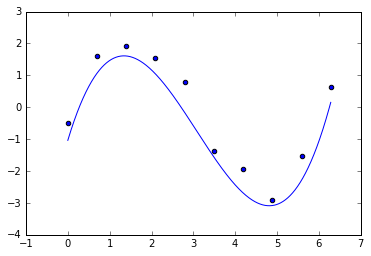

In [80]:
plt.scatter(x,y)
plt.plot(line,new_y)
plt.show()

## Overfitting

이와 같이 선형문제로 근사할수 없는 데이터에 대해서 비선형방식으로 푸는 방법이 있다는것을 보았다.

그렇다면 차수를 높이면 더 좋은 방정식이 생길 수도 있다고 생각할수도 있을 것이다. 실제로 해보자

In [83]:
from numpy.polynomial.polynomial import polyfit
n_2 = 9
w_2 = polyfit(x,y,deg=n_2)
line_2 = np.linspace(0,x[-1],1000)
new_y_2 = get_new_y(line_2,w_2,n=n_2)

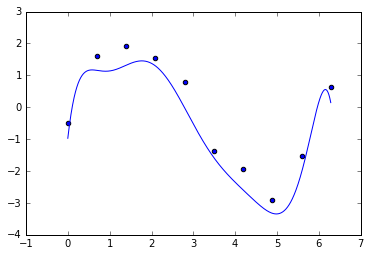

In [84]:
plt.scatter(x,y)
plt.plot(line_2, new_y_2)
plt.show()

기존에 있던 차수가 3차였던 근사보다 데이터 값에 더 가까워 졌지만, 오히려 기존 함수보다 원래 함수를 표현하지 못하는 현상이 발생한다.

이런 현상을 과적합(Overfitting)이라고 한다.

과적합현상은 데이터의 양에 비하여 Parameter의 개수가 많을 때에 주로 발생한다.

다항함수회귀에서 차수가 높아질수록 파라메터의 값인 $w_i$의 개수가 많아지는데 데이터는 계속 15개라서 이러한 현상이 발생하게 된다.

Overfitting 현상을 방지하기 위해서는 보통 3가지 방법을 쓰게 된다.

    1. 데이터의 숫자를 늘린다.
    2. 베이지안 추정(Bayesian Estimation)을 이용한다.
    3. Regulariztion을 한다.
    
이중에 Rugularization과 베이지안 추정은 추후에 다루도록 하겠다.